<a href="https://colab.research.google.com/github/Thrcordeiro/BodyFat/blob/main/PROGRAMA%C3%87%C3%83O_PARA_APRENDIZADO_DE_MAQUINAS_BodyFat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Centro de Informática da UFPE**
### Pós-graduação em Ciência de Dados
### Programação para Aprendizado de Máquinas

**Fábio Rodrigo Cavalcante da Silva**

**Thaina Mariah Ramos Cordeiro**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

BodyFat = pd.read_csv('https://raw.githubusercontent.com/fabiorodrigocs/bodyfat/main/bodyfat.csv')


# **ANÁLISE DO DATASET**

In [ ]:
BodyFat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Dataset:

* Densidade flutuada 
em água
* Percentual de gordura (%)
* Idade
* Peso (lb)
* Altura (polegadas)
* Pescoço (cm)
* Peito (cm)
* Abdomen (cm)
* Quadril (cm)
* Coxa (cm)
* Joelho (cm)
* Biceps (cm)
* Antebraço (cm)
* Pulso (cm)
* Tornozelo (cm)


In [ ]:
BodyFat.shape

(252, 15)

In [ ]:
BodyFat.head().round(1)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.1,12.3,23,154.2,67.8,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.1,6.1,22,173.2,72.2,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0,25.3,22,154.0,66.2,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.1,10.4,26,184.8,72.2,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0,28.7,24,184.2,71.2,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


**Modificação das unidade (lb e pol) para unidades do SI:**

In [ ]:
BodyFat['Weight']=BodyFat['Weight']*0.453592     #Transformando Weight em Kg
BodyFat.rename(columns={'Weight': 'Peso(kg)'}, inplace = True)
BodyFat['Height']=BodyFat['Height']*2.54         #Transformando Altura em cm
BodyFat.rename(columns={'Height': 'Altura(cm)'}, inplace = True)

**Modificação dos títulos para língua portuguesa:**

In [ ]:
BodyFat.rename(columns={'Density': 'Densidade Flutuada'}, inplace = True)
BodyFat.rename(columns={'BodyFat': '%Gord'}, inplace = True)
BodyFat.rename(columns={'Age': 'Idade'}, inplace = True)
BodyFat.rename(columns={'Neck': 'Pescoço(cm)'}, inplace = True)
BodyFat.rename(columns={'Chest': 'Peito(cm)'}, inplace = True)
BodyFat.rename(columns={'Abdomen': 'Abdômen(cm)'}, inplace = True)
BodyFat.rename(columns={'Hip': 'Quadril(cm)'}, inplace = True)
BodyFat.rename(columns={'Thigh': 'Coxa(cm)'}, inplace = True)
BodyFat.rename(columns={'Knee': 'Joelho(cm)'}, inplace = True)
BodyFat.rename(columns={'Ankle': 'Bíceps(cm)'}, inplace = True)
BodyFat.rename(columns={'Biceps': 'Antebraço(cm)'}, inplace = True)
BodyFat.rename(columns={'Forearm': 'Pulso(cm)'}, inplace = True)
BodyFat.rename(columns={'Wrist': 'Tornozelo(cm)'}, inplace = True)


In [ ]:
BodyFat.head().round(1)

,Densidade Flutuada,%Gord,Idade,Peso(kg),Altura(cm),Pescoço(cm),Peito(cm),Abdômen(cm),Quadril(cm),Coxa(cm),Joelho(cm),Bíceps(cm),Antebraço(cm),Pulso(cm),Tornozelo(cm)
0,1.1,12.3,23,70.0,172.1,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.1,6.1,22,78.6,183.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0,25.3,22,69.9,168.3,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.1,10.4,26,83.8,183.5,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0,28.7,24,83.6,181.0,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## **Estatística descritiva:**

In [ ]:
BodyFat.describe().transpose().round(2)

# retirar dados com %Gord < 7%
# retirar dados com altura < 150 cm
# retirar densidade menor que 1.0

,count,mean,std,min,25%,50%,75%,max
Densidade Flutuada,252.0,1.06,0.02,1.00,1.04,1.05,1.07,1.11
%Gord,252.0,19.15,8.37,0.00,12.48,19.20,25.30,47.50
Idade,252.0,44.88,12.60,22.00,35.75,43.00,54.00,81.00
Peso(kg),252.0,81.16,13.33,53.75,72.12,80.06,89.36,164.72
Altura(cm),252.0,178.18,9.30,74.93,173.36,177.80,183.52,197.48
Pescoço(cm),252.0,37.99,2.43,31.10,36.40,38.00,39.42,51.20
Peito(cm),252.0,100.82,8.43,79.30,94.35,99.65,105.38,136.20
Abdômen(cm),252.0,92.56,10.78,69.40,84.57,90.95,99.32,148.10
Quadril(cm),252.0,99.90,7.16,85.00,95.50,99.30,103.52,147.70
Coxa(cm),252.0,59.41,5.25,47.20,56.00,59.00,62.35,87.30


In [ ]:
#sns.pairplot( BodyFat, vars=["Idade","Altura(cm)", "Densidade Flutuada","Peso(kg)","Peito(cm)","Abdômen(cm)","%Gord"]) 


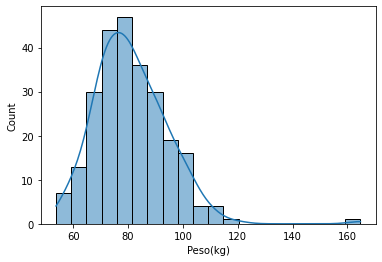

In [ ]:
#sns.histplot( BodyFat['Densidade Flutuada'], kde=True, bins=20)
#sns.histplot( BodyFat['%Gord'], bins = 20, kde=True)
#sns.histplot( BodyFat['Idade'], kde=True, bins = 20)
sns.histplot( BodyFat['Peso(kg)'], kde=True, bins =20)
#sns.histplot( BodyFat['Altura(cm)'], kde=True)
#sns.histplot( BodyFat['Pescoço(cm)'], kde=True)
#sns.histplot( BodyFat['Peito(cm)'], kde=True)
#sns.histplot( BodyFat['Abdômen(cm)'], kde=True)
#sns.histplot( BodyFat['Quadril(cm)'], kde=True)
#sns.histplot( BodyFat['Coxa(cm)'], kde=True)
#sns.histplot( BodyFat['Joelho(cm)'], kde=True)
#sns.histplot( BodyFat['Bíceps(cm)'], kde=True)
#sns.histplot( BodyFat['Antebraço(cm)'], kde=True)
#sns.histplot( BodyFat['Pulso(cm)'], kde=True)
#sns.histplot( BodyFat['Tornozelo(cm)'], kde=True)


#plt.tight_layout()

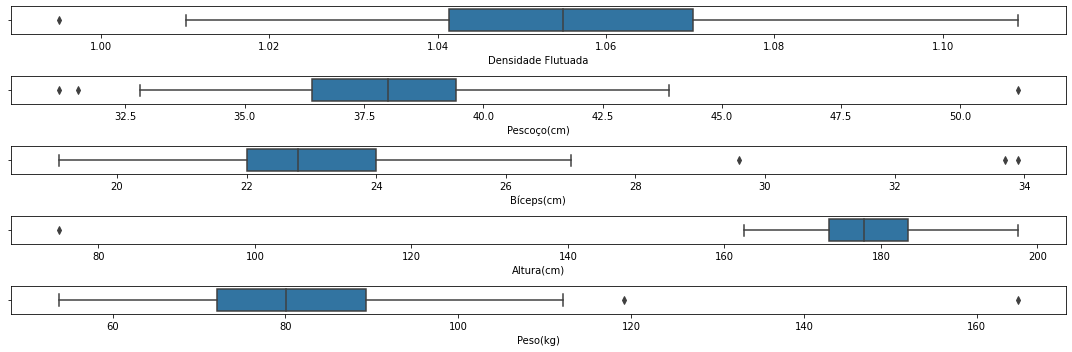

In [ ]:
# Verificando se existem outliers:
fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(5,1, figsize = (15,5))
sns.boxplot(data = BodyFat, x = 'Densidade Flutuada', ax = axis1)
sns.boxplot(data = BodyFat, x = 'Pescoço(cm)', ax = axis2)
sns.boxplot(data = BodyFat, x = 'Bíceps(cm)', ax = axis3)
sns.boxplot(data = BodyFat, x = 'Altura(cm)', ax = axis4)
sns.boxplot(data = BodyFat, x = 'Peso(kg)', ax = axis5)
plt.tight_layout()

In [ ]:
 # Retirando outliers
 df_remove = BodyFat.loc[(BodyFat['Densidade Flutuada'] < 1) | (BodyFat['Altura(cm)'] < 140) | (BodyFat['Pescoço(cm)'] > 45) | (BodyFat['Bíceps(cm)'] > 32) | (BodyFat['Peso(kg)'] > 120) ]
 BodyFat = BodyFat.drop(df_remove.index)


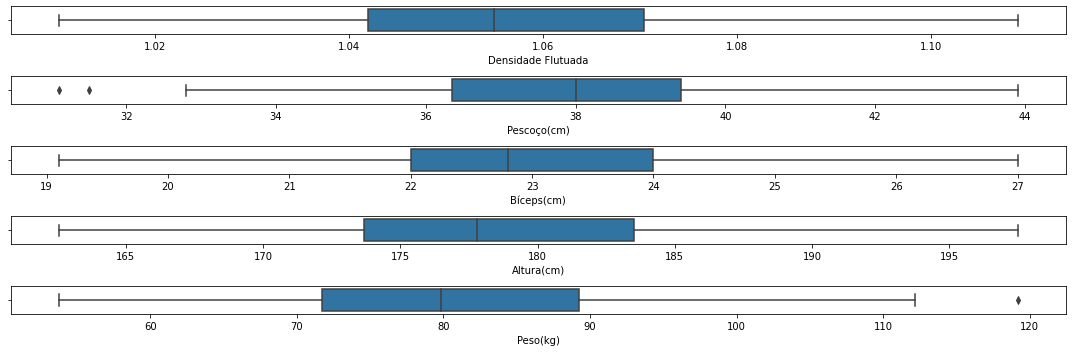

In [ ]:
fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(5,1, figsize = (15,5))
sns.boxplot(data = BodyFat, x = 'Densidade Flutuada', ax = axis1)
sns.boxplot(data = BodyFat, x = 'Pescoço(cm)', ax = axis2)
sns.boxplot(data = BodyFat, x = 'Bíceps(cm)', ax = axis3)
sns.boxplot(data = BodyFat, x = 'Altura(cm)', ax = axis4)
sns.boxplot(data = BodyFat, x = 'Peso(kg)', ax = axis5)
plt.tight_layout()

## **Avaliando as correlações entre as features e o BodyFat (%Gord):**

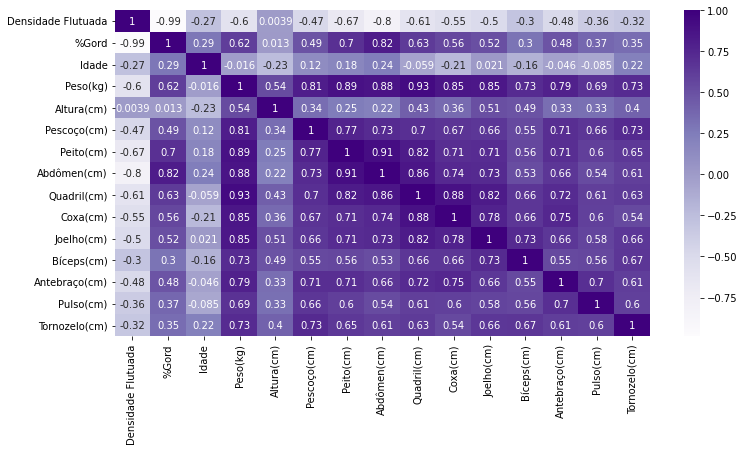

In [ ]:
#Gerar a matriz de correlações utilizando o método seaborn.heatmap()
BodyFat.corr()
BodyFat_corr = BodyFat.corr(method='pearson')
plt.figure(figsize=(12, 6))
sns.heatmap(BodyFat_corr, cmap = 'Purples', fmt = '.2g', annot=True)
plt.show()

## **Selecionando as variáveis mais relevantes:**

In [ ]:
# Densidade flutuada: corr = 0.99
# Abdômen: corr = 0.81
# Peito = 0.70
# Peso: corr = 0.61
# Quadril: corr = 0.63

# RETIRADA 'DENSIDADE FLUTUADA' POR QUESTÕES DIDÁTICAS


BodyFat = BodyFat.drop(columns=['Densidade Flutuada', 'Idade','Altura(cm)','Pescoço(cm)', 'Coxa(cm)', 'Joelho(cm)', 'Bíceps(cm)','Antebraço(cm)', 'Pulso(cm)', 'Tornozelo(cm)', 'Quadril(cm)', 'Peito(cm)'])
BodyFat

,%Gord,Peso(kg),Abdômen(cm)
0,12.3,69.966566,85.2
1,6.1,78.584814,83.0
2,25.3,69.853168,87.9
3,10.4,83.801122,86.4
4,28.7,83.574326,100.0
...,...,...,...
247,11.0,60.894726,83.6
248,33.6,91.171992,105.0
249,29.3,84.708306,111.5
250,26.0,86.522674,101.3


# **REGRESSÃO LINEAR**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y = '%Gord'                            # variável-alvo
X = BodyFat.drop([y], axis = 'columns')        # variável X (retirando a variável y da tabela)   
X


,Peso(kg),Abdômen(cm)
0,69.966566,85.2
1,78.584814,83.0
2,69.853168,87.9
3,83.801122,86.4
4,83.574326,100.0
...,...,...
247,60.894726,83.6
248,91.171992,105.0
249,84.708306,111.5
250,86.522674,101.3


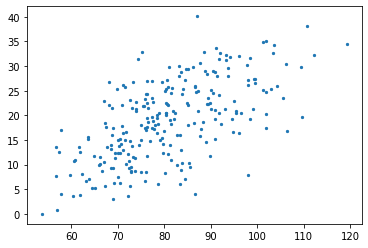

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X['Peso(kg)'],BodyFat['%Gord'], s= 5, vmin=0, vmax=20)

ax.set(autoscale_on = True)

plt.show()

## **Separando os dados de treino e os dados de teste:**

* Xtrain: dados de treino
* Xtest: dados de teste/validação
* Ytrain: variável alvo de treino
* Ytest: variável alvo de teste/validação

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, BodyFat[y], test_size=0.3, random_state = 0)

print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

# train_test_split: separa um data frame ou um array em dados de treino e de teste de acordo com os parâmetros dados.
# teste_size = 0.3: fixa 30% para dados de teste e 70% para dados de treino
# random_state = 0: fixa sempre a mesma divisão entre dados de treino e dados de teste.

(172, 2) (75, 2) (172,) (75,)




*  Xtrain: 176 linhas e 05 colunas  
*  ytrain: 176 linas e 01 coluna
*  Xtest: 76 linhas e 05 colunas
*  Ytest: 76 linhas e 01 coluna     
      
   





## **Rodando o modelo:**

In [ ]:
# Cria o modelo de regressão linear já normalizando os dados de entrada.
modelo = LinearRegression(normalize = True)

# Treinando o modelo e apresentando os coeficientes:
modelo.fit(Xtrain, Ytrain)
print("Coeficientes = ", modelo.coef_)
print("Intercepto = ", modelo.intercept_)


Coeficientes =  [-0.28584331  0.95823514]
Intercepto =  -46.59538334888746


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
# R2 com dados de treino:
Yprev_train  = modelo.predict(Xtrain)
print('R2 Score: %.2f' % r2_score(Ytrain, Yprev_train))


R2 Score: 0.73


In [ ]:
# Rodando o modelo com os dados de teste:
modelo.fit(Xtest, Ytest)
modelo.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


array([-0.2703611 ,  0.97576967])

In [ ]:
Yprev_test  = modelo.predict(Xtest)
# R2 com dados de teste:
print('R2 Score: %.2f' % r2_score(Ytest, Yprev_test))

R2 Score: 0.68


In [ ]:
# Fazendo a previsão:
# O método predict pega o modelo treinado e faz a previsão com os coeficientes da regressão.
# É necessário passar apenas o Xval, com 76 linhas e ele retornará um array com 76 previsões de y.
Yprev  = modelo.predict(Xtest)
Yprev 

array([22.88245966, 18.79157149, 22.25188159, 20.02146454, 15.09689527,
       19.33221936, 12.48267911,  6.99300997, 19.77619728, 24.46905013,
       26.14701115, 22.61948016, 19.0100394 , 16.08356608, 19.71873951,
       19.44220916, 22.17466656, 31.93796497, 24.66564442, 14.63997118,
       15.79499657, 11.93022308, 18.62503094,  8.79095492, 10.71448555,
       23.53718738, 31.33509327, 22.82439722,  8.42986511, 19.66711449,
       19.81510713, 15.97864468, 13.53626848, 17.68082669,  8.70132706,
       19.45280797, 18.59702223, 24.11644277,  8.40064706, 18.8169305 ,
       20.85219361,  9.35635712, 29.26712672, 22.70411095, 27.95736893,
       19.70723369, 16.9933242 , 16.24071717, 16.87598997, 16.24692359,
       16.47743066, 21.94469283, 28.21679172, 16.12398762, 28.57583651,
       16.51929255,  8.31457591, 15.56237314, 23.35883867, 22.19056477,
       18.19195417, 17.53608843, 33.82969917, 11.01546789, 26.56177101,
       17.72708098, 21.36604212, 28.98385661, 13.10674842, 17.53

In [ ]:
modelo.coef_


array([-0.2703611 ,  0.97576967])

In [ ]:
modelo.intercept_

-48.64810831596139

# **CÁLCULO DAS MÉTRICAS DO MODELO**

In [ ]:


# Erro Quadrático Médio (MSE)
print('MSE: %.2f' % mean_squared_error(Ytest, Yprev))

MSE: 16.45


In [ ]:
# Erro Absoluto Médio (MAE)
print('MAE: %.2f' % mean_absolute_error(Ytest, Yprev))

MAE: 3.28


In [ ]:
# R2 Score
print('R2 Score: %.2f' % r2_score(Ytest, Yprev))

R2 Score: 0.68


Referências:
* https://dadosaocubo.com/regressao-com-scikit-learn/
* https://www.dataquest.io/blog/understanding-regression-error-metrics/